# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data

# Extract all rows -- # rows class = 'tr'
rows = soup.find_all('tr')



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list

data =[]


# Loop through the scraped data to create a list of rows
# Loop through the rows and extract data--- # cols class = 'td'
for row in rows:
    cols = row.find_all('td')
    cols = [x.text.strip() for x in cols]  # to get text and strip white spaces
    if cols: # only add rows that have data
        data.append(cols)

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [12]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
#df['terrestrial_date'] = df['terrestrial_date'].astype(datetime)
df = df.astype({'terrestrial_date' : 'datetime64[ns]',
                'sol' : 'int32',
                'ls' : 'int32',
                'month' : 'int32',
                'min_temp' : 'float64',
                'pressure' : 'float64'
               })

In [16]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
#months = df['month'].max
#months
unique_months = df['month'].unique()
months_count = len(unique_months)
print(f'There are {months_count} months on Mars')

There are 12 months on Mars


In [19]:
# 2. How many sols (Martian days) worth of data are there?
sols_count = df['sol'].count()
print(f'There is {sols_count} sol days worth of data.')

There is 1867 sol days worth of data.


In [20]:
# 3. What is the average minimum temperature by month?
avg_min_monthly_temp = df.groupby('month')['min_temp'].mean()
print(f'The average minimun temperature by month is {avg_min_monthly_temp}.')

The average minimun temperature by month is month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64.


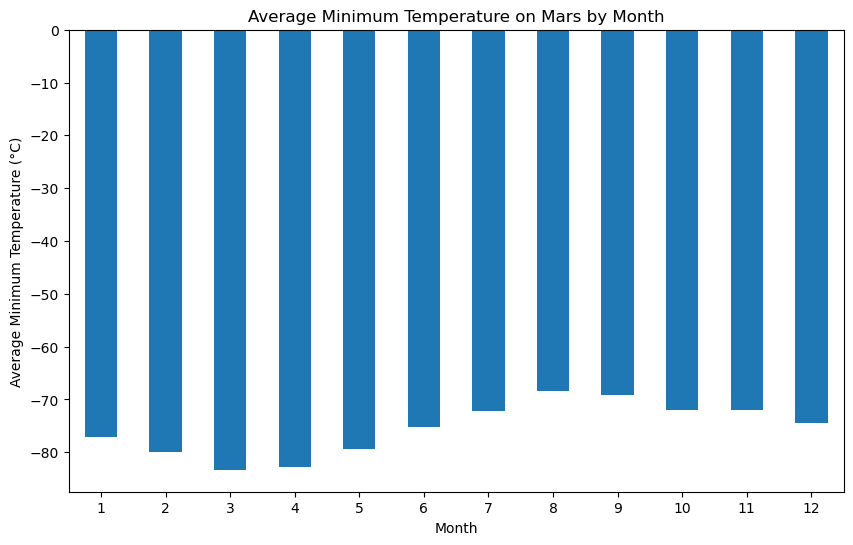

In [21]:
# Plot the average minimum temperature by month

fig = plt.figure(figsize=(10, 6))
avg_min_monthly_temp.plot(kind='bar')
plt.title('Average Minimum Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

The coldest temperature of -83.30729166666667 °C is observed in the 3rd month.
The hottest temperature of -68.38297872340425 °C is observed in the 8th month.


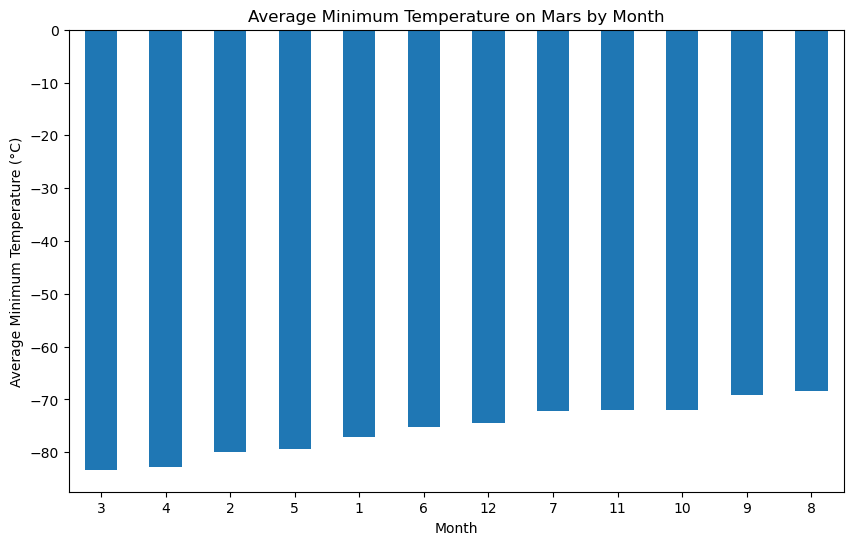

In [22]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
#first sort the min_temp col in the ascending order
sorted_avg_min_temp = avg_min_monthly_temp.sort_values()
#sorted_avg_min_temp

#Find the coldest and hottest temps
coldest_temp = sorted_avg_min_temp.min()
hottest_temp = sorted_avg_min_temp.max()

#Find the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()

print(f'The coldest temperature of {coldest_temp} °C is observed in the {coldest_month}rd month.')
print(f'The hottest temperature of {hottest_temp} °C is observed in the {hottest_month}th month.')

#Plot the data
fig = plt.figure(figsize=(10, 6))
sorted_avg_min_temp.plot(kind='bar')
plt.title('Average Minimum Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

In [23]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print(f'The average pressure by month is {avg_pressure_by_month}')

The average pressure by month is month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


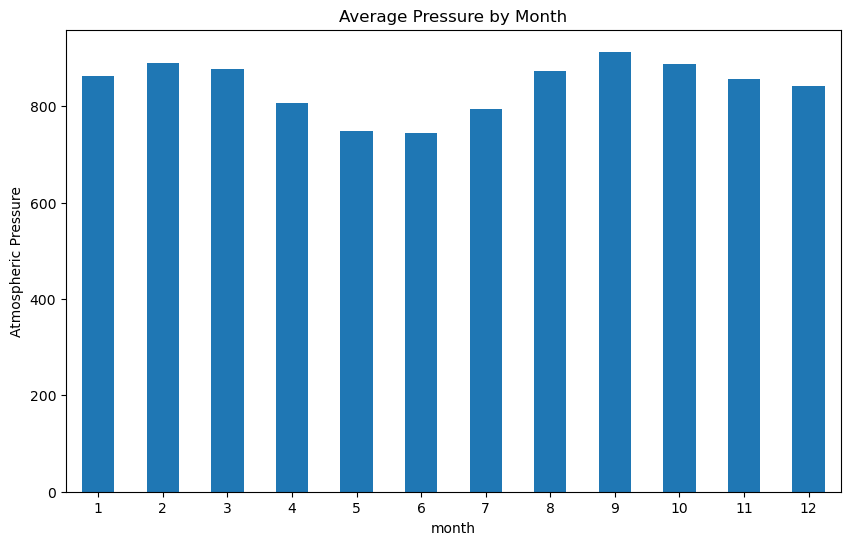

In [24]:
# Plot the average pressure by month
fig = plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

The lowest pressure of 745.0544217687075 units is observed in the 6th month.
The highest pressure of 913.3059701492538 units is observed in the 9th month.


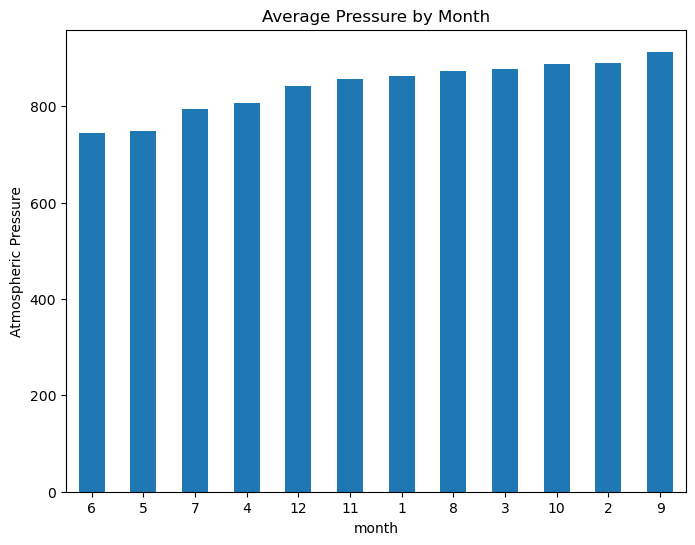

In [25]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
#first sort the pressure column in the ascending order
sorted_avg_pressure = avg_pressure_by_month.sort_values()

#Find the lowest and highest pressure recorded
lowest_pressure = avg_pressure_by_month.min()
highest_pressure = avg_pressure_by_month.max()

#Find the coldest and hottest months
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()

print(f'The lowest pressure of {lowest_pressure} units is observed in the {lowest_pressure_month}th month.')
print(f'The highest pressure of {highest_pressure} units is observed in the {highest_pressure_month}th month.')

#Plot the data
fig = plt.figure(figsize=(8, 6))
sorted_avg_pressure.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

In [26]:
earth_unique_count = df['terrestrial_date'].nunique()
print(earth_unique_count)
Mars_unique_count = df['sol'].nunique()
print(Mars_unique_count)

1867
1867


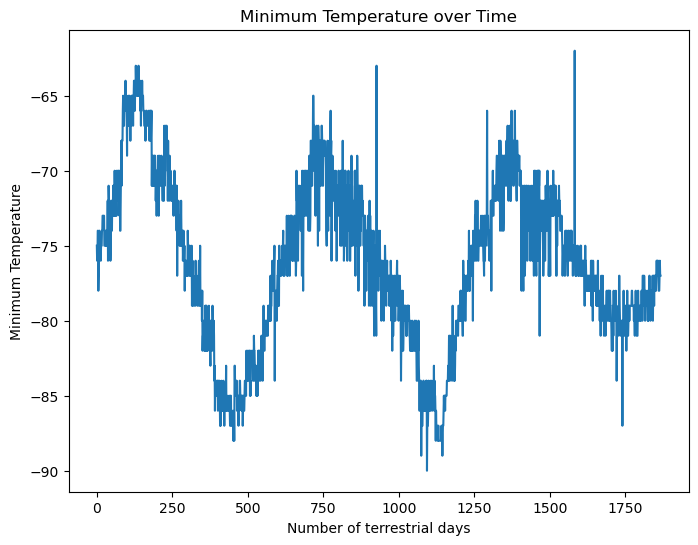

There are a total of 1867 unique terrestrial days in this dataset and from the plot below, it looks like that the data is worth three Martain years as there are 3 sets od peaks and valleys. Therefore, one Martian year is likely around 622 earth days.


In [27]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


#Plot the data
fig = plt.figure(figsize=(8, 6))
df['min_temp'].plot(kind='line')
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.xticks(rotation=0)
plt.show()

print(f'There are a total of 1867 unique terrestrial days in this dataset and from the plot below, it looks like that the data is worth three Martain years as there are 3 sets od peaks and valleys. Therefore, one Martian year is likely around 622 earth days.')


#### Minimum Temperature

Being further away from Sun, Mars appears to be a really cold temperature. The average minimum temperature falls below -60 degree celsius for all seasons. It goes further down during the winter season (Months #3, 4), below -80 degree celsius. The average minimum lowest temperature on Mars was recorded in months 3 with a value of -83.30 °C, while average minimum highest temperature was recorded in month 8 with a value of -68.38 °C. 
.

#### Atmospheric Pressure

The atmospheric pressure of Mars is quite low, ranging from 745-913 pascals which explains the lack of atmosphere on its surface. The smaller size of Mars compared to earth generates weak gravitational force which does not seem to be enough to hold onto the atmospheric gases. 
The lowest pressure of 745.05 pascals is observed in the 6th month on Mars.
The highest pressure of 913.3 pascals8 units is observed in the 9th mont on Marsh.

#### Year Length
1 Martian Year is approx. 622 earth days.
There are a total of 1867 unique terrestrial days in this dataset and from the plot below, it looks like that the data is worth 3 Martain years as there are 3 sets of peaks and valleys. Therefore, one Martian year is likely around (1867/3)  622 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
df.to_csv('output_file.csv', index=False)

In [33]:
browser.quit()